In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from __future__ import division
from sklearn.neural_network import MLPClassifier
from sklearn import metrics
from sklearn import model_selection
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from __future__ import division
from sklearn.metrics import mean_squared_error, r2_score


#llegeixo l'arxiu sense les paraules que nomes apareixien una vegada

df = pd.read_csv('./clean_authors.csv') 
df = df.drop('Unnamed: 0',axis=1)
df.head(5)

,RT_l10,sd_RT,FC_l10,sd_FC,FC,RT,protected,followers_count,friends_count,listed_count,favourites_count,statuses_count
0,0.0,0.000000,0.3,0.458258,0.0,0.0,0.0,557.0,650.0,19.0,6218.0,5983.0
1,3.6,6.711185,2.8,5.015974,0.0,1.0,0.0,54626.0,4640.0,1646.0,405.0,70865.0
2,0.1,0.300000,0.7,0.781025,0.0,0.0,0.0,724.0,290.0,56.0,2483.0,61124.0
3,0.1,0.300000,0.5,0.670820,0.0,0.0,0.0,710.0,1140.0,2.0,9774.0,6902.0
4,0.8,1.249000,4.5,6.917369,1.0,0.0,0.0,3965.0,2534.0,132.0,7022.0,19898.0


In [64]:
df.describe()

,RT_l10,sd_RT,FC_l10,sd_FC,FC,RT,protected,followers_count,friends_count,listed_count,favourites_count,statuses_count
count,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.0,96.000000,96.000000,96.000000,96.000000,96.000000
mean,6.216667,12.244134,11.013542,21.200448,4.770833,2.208333,0.0,3300.843750,872.979167,57.739583,13465.302083,20746.677083
std,51.834239,110.154160,84.776209,181.291399,25.868281,12.760067,0.0,7543.189228,1129.329414,180.203175,34440.465216,37347.540709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,9.000000,5.000000,0.000000,5.000000,41.000000
25%,0.000000,0.000000,0.500000,0.605234,0.000000,0.000000,0.0,202.750000,208.500000,2.000000,428.750000,2533.500000
50%,0.200000,0.400000,1.150000,1.089906,1.000000,0.000000,0.0,552.500000,413.000000,7.000000,2865.500000,7770.500000
75%,0.600000,0.916515,2.500000,3.126718,2.000000,0.000000,0.0,3448.500000,957.750000,46.500000,13675.750000,24581.250000
max,507.700000,1080.126201,831.800000,1778.543325,251.000000,115.000000,0.0,54626.000000,4939.000000,1646.000000,247616.000000,275233.000000


{'whiskers': [<matplotlib.lines.Line2D at 0x1a29dc4be0>,
 'caps': [<matplotlib.lines.Line2D at 0x1a29d0f4e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a29dc4a90>],
 'medians': [<matplotlib.lines.Line2D at 0x1a29d0fd30>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a29d16198>],
 'means': []}

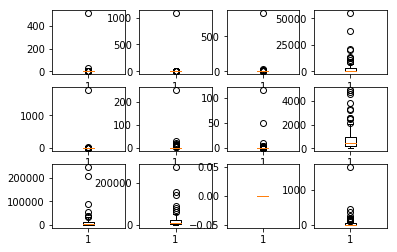

In [57]:
fig, axs = plt.subplots(3, 4)
axs[0, 0].boxplot(df[df.columns[0,]])
axs[0, 1].boxplot(df[df.columns[1,]])
axs[0, 2].boxplot(df[df.columns[2,]])
axs[1, 0].boxplot(df[df.columns[3,]])
axs[1, 1].boxplot(df[df.columns[4,]])
axs[1, 2].boxplot(df[df.columns[5,]])
axs[2, 2].boxplot(df[df.columns[6,]])
axs[0, 3].boxplot(df[df.columns[7,]])
axs[1, 3].boxplot(df[df.columns[8,]])
axs[2, 3].boxplot(df[df.columns[9,]])
axs[2, 0].boxplot(df[df.columns[10,]])
axs[2, 1].boxplot(df[df.columns[11,]])


In [65]:
from sklearn import linear_model
X = df.drop('RT_l10',axis=1)
Y = df['RT_l10']

clf = linear_model.LinearRegression()
clf = clf.fit(X,Y)


In [66]:
# Creamos el objeto de Regresión Linear
regr = linear_model.LinearRegression()
 
# Entrenamos nuestro modelo
regr.fit(X, Y)
 
# Hacemos las predicciones que en definitiva una línea (en este caso, al ser 2D)
y_pred = regr.predict(X)
 
# Veamos los coeficienetes obtenidos, En nuestro caso, serán la Tangente
print('Coefficients: \n', regr.coef_)
# Este es el valor donde corta el eje Y (en X=0)
print('Independent term: \n', regr.intercept_)
# Error Cuadrado Medio
print("Mean squared error: %.2f" % mean_squared_error(Y, y_pred))
# Puntaje de Varianza. El mejor puntaje es un 1.0
print('Variance score: %.2f' % r2_score(Y, y_pred))

Coefficients: 
 [ 3.65186044e-01  4.03716692e-01 -1.37259720e-01 -6.36162933e-02
  3.29801439e-01  1.66533454e-16 -1.64840411e-05 -1.37662402e-06
  7.51431868e-04 -3.02559753e-06  1.47042284e-07]
Independent term: 
 -0.1659965570566415
Mean squared error: 0.13
Variance score: 1.00
